In [ ]:
#
# Generating data based on James Rawlings example
# https://github.com/rawlings-group/paresto/blob/master/examples/green_book/hbv_det.m
#

In [27]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

In [2]:
def rxnrate(t, c):
    ca = c[0]
    cb = c[1]
    cc = c[2]
    
    kr = [2, 0.025, 1000, 0.25, 1.9985, 7.5E-6]
    
    rhs = [kr[1]*cb - kr[3]*ca,
         kr[0]*ca - kr[1]*cb - kr[5]*cb*cc,
         kr[2]*ca - kr[4]*cc - kr[5]*cb*cc]
    
    return rhs

In [3]:
sol = solve_ivp(rxnrate, [0, 100], [1.0, 0.0, 0.0])

In [15]:
texp = np.linspace(0, 100, num = 51)
ca_exp_wo_noise = interp1d(sol.t, sol.y[0,:])(texp)
cb_exp_wo_noise = interp1d(sol.t, sol.y[1,:])(texp)
cc_exp_wo_noise = interp1d(sol.t, sol.y[2,:])(texp)

In [22]:
ca_exp = ca_exp_wo_noise * (1 + 0.1 * np.random.normal(size = len(ca_exp_wo_noise)))
cb_exp = cb_exp_wo_noise * (1 + 0.1 * np.random.normal(size = len(cb_exp_wo_noise)))
cc_exp = cc_exp_wo_noise * (1 + 0.1 * np.random.normal(size = len(cc_exp_wo_noise)))

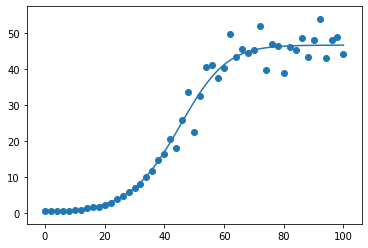

In [23]:
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0,:])
ax.scatter(texp, ca_exp)

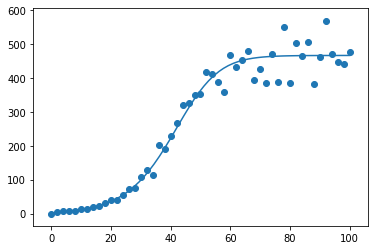

In [24]:
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[1,:])
ax.scatter(texp, cb_exp)

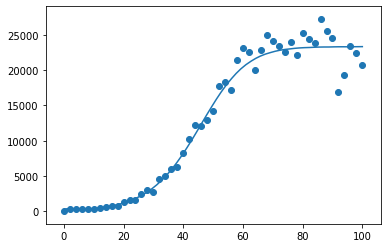

In [25]:
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[2,:])
ax.scatter(texp, cc_exp)

In [28]:
hbv_df = pd.DataFrame({'t': texp, 'ca_exp': ca_exp, 'cb_exp': cb_exp, 'cc_exp': cc_exp})
hbv_df

,t,ca_exp,cb_exp,cc_exp
0,0.0,0.734562,0.000000,0.000000
1,2.0,0.707371,3.444986,373.654198
2,4.0,0.521003,6.148200,280.451066
3,6.0,0.680192,7.458215,301.503717
4,8.0,0.716159,8.115554,363.551492
5,10.0,0.873506,14.450414,317.167060
6,12.0,1.006185,13.726339,415.030255
7,14.0,1.328006,18.234002,658.581413
8,16.0,1.837510,22.316745,825.341155
9,18.0,1.820254,30.080520,803.705853


In [29]:
hbv_df.to_csv('hbv_data.csv', index = False)